In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/processed/cleaned_data.csv")

<Axes: xlabel='Attrition', ylabel='count'>

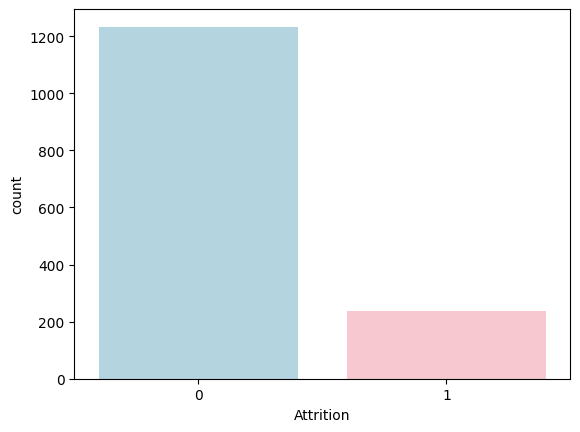

In [5]:
# attrition distrbution 
sns.countplot( x= "Attrition", data=data, palette=["lightblue","pink"], hue="Attrition", legend=False)

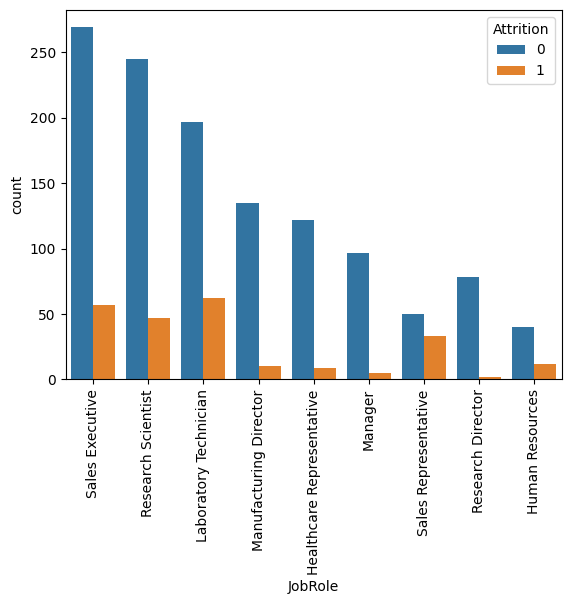

In [6]:
# attrition by jobRole 
sns.countplot(x="JobRole",hue="Attrition",data=data)
plt.xticks(rotation=90)
plt.show()

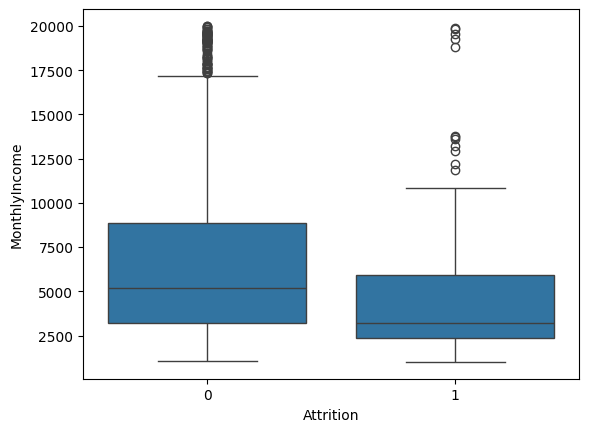

In [7]:
#distribution of monthly income

sns.boxplot(x = "Attrition", y ="MonthlyIncome",data=data)
plt.show()

In [8]:
def hist_with_hue(data, col, hue):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.title("Distrbution plot")
    sns.histplot(x=col, data=data,hue=hue, kde=True, palette='Set2')

    plt.subplot(1,2,2)
    plt.title("Box plot")
    sns.boxplot(x=hue, y=col, data=data, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}")
    plt.tight_layout()

    plt.show()

/tmp/ipykernel_22285/2465095927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='Set2')


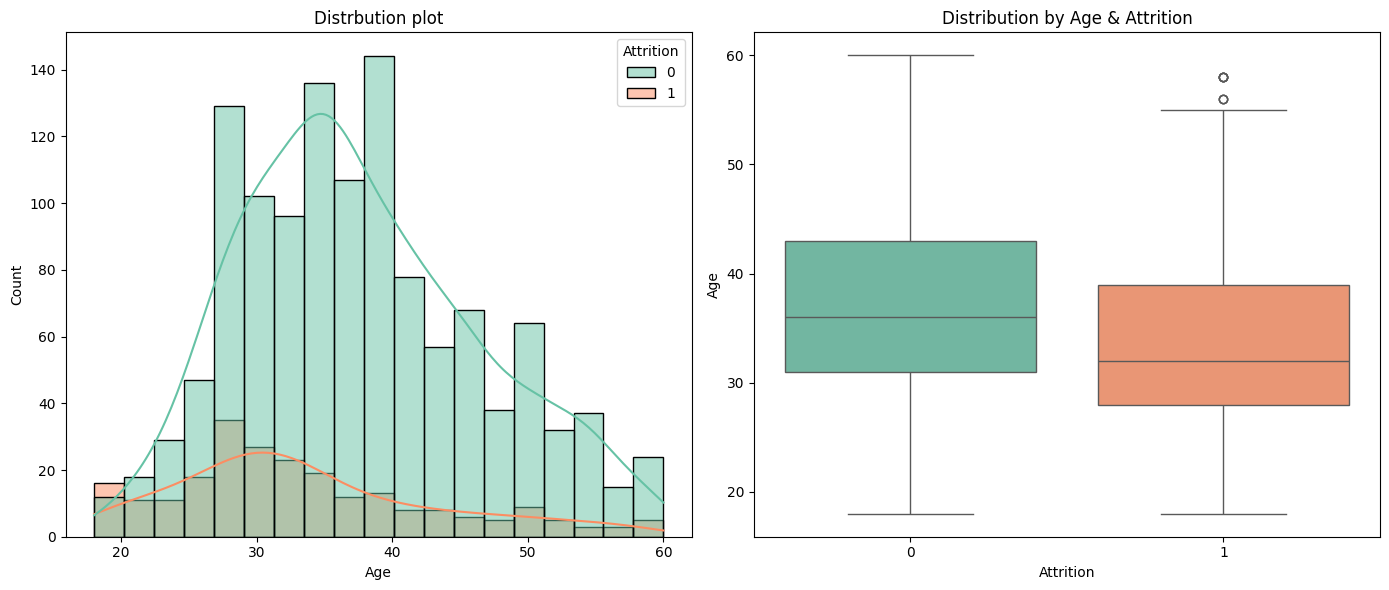

In [9]:
hist_with_hue(data, 'Age', 'Attrition')

/tmp/ipykernel_22285/2465095927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='Set2')


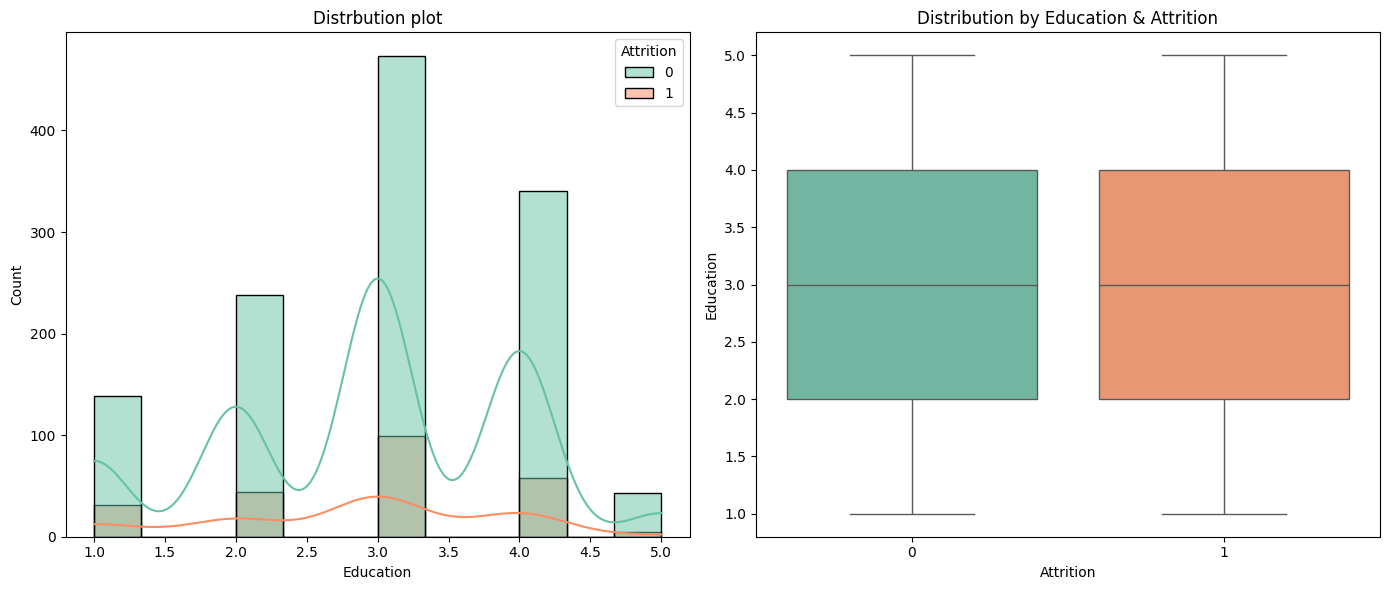

In [10]:
hist_with_hue(data, 'Education', 'Attrition')

/tmp/ipykernel_22285/2465095927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='Set2')


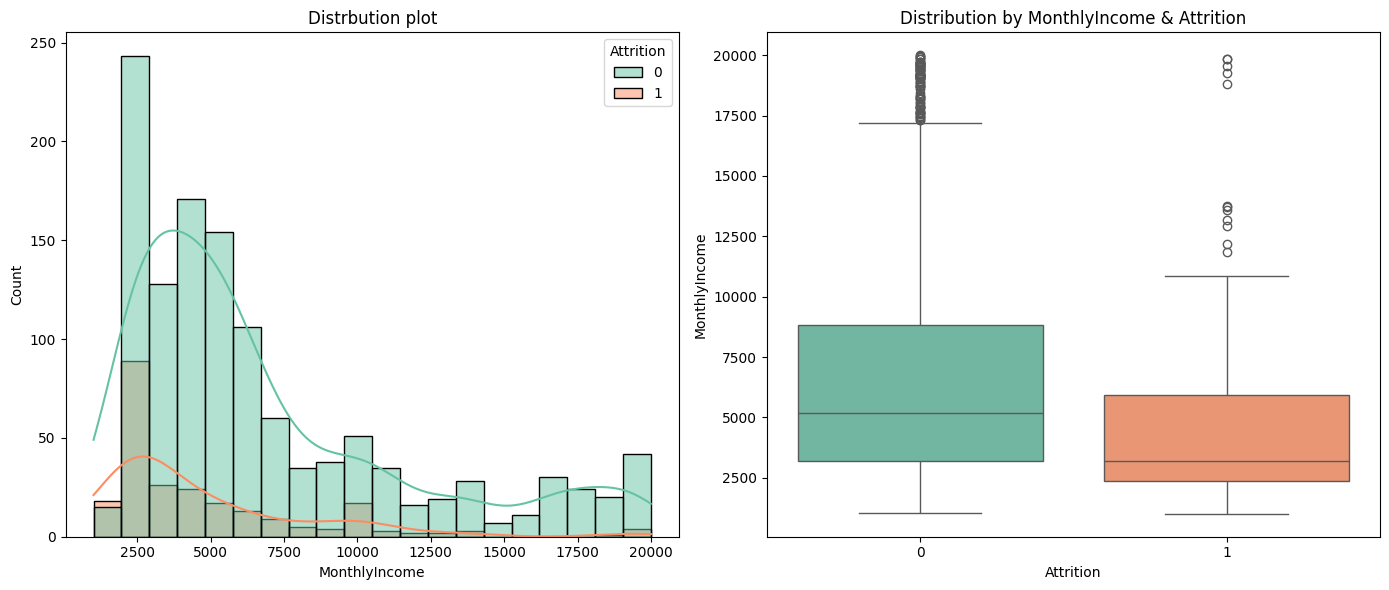

In [11]:
hist_with_hue(data, 'MonthlyIncome', 'Attrition')

/tmp/ipykernel_22285/2465095927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='Set2')


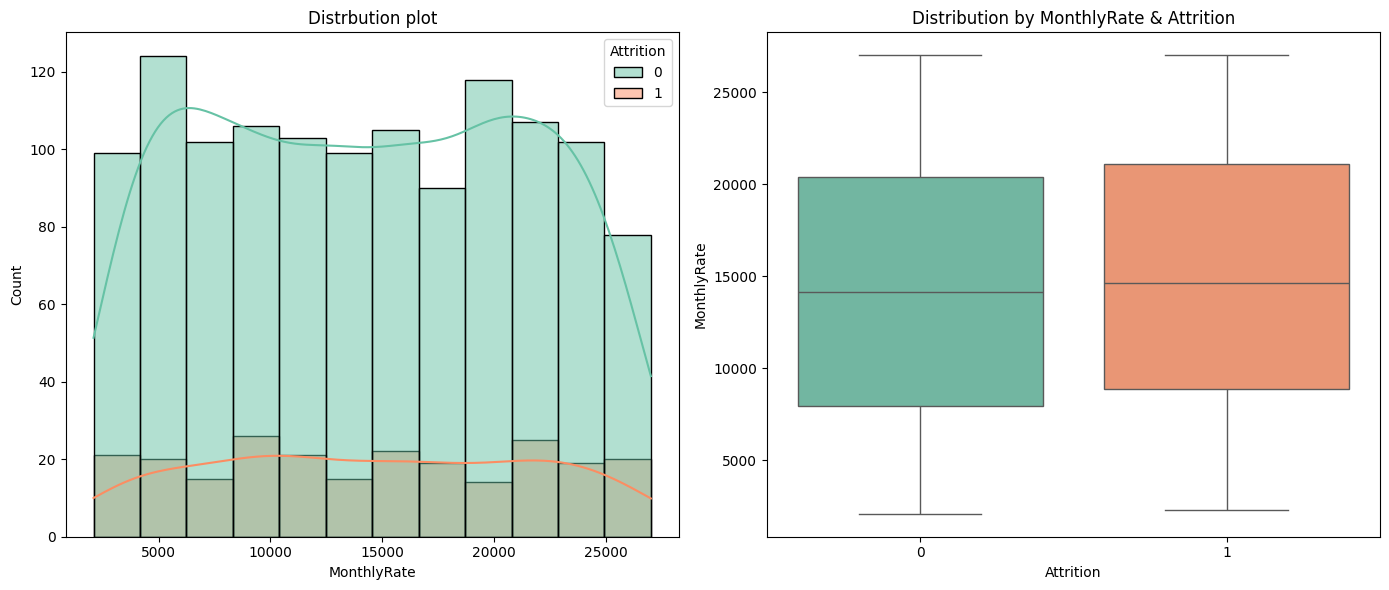

In [12]:
hist_with_hue(data, 'MonthlyRate', 'Attrition')

/tmp/ipykernel_22285/2465095927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='Set2')


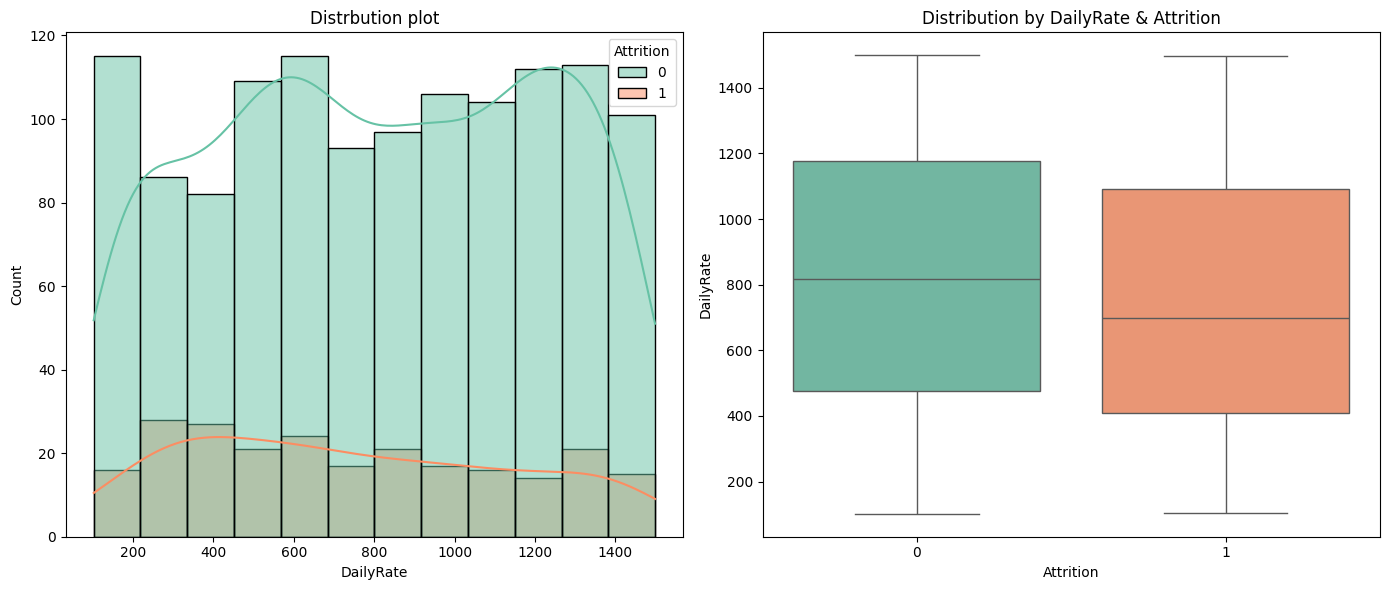

In [13]:
hist_with_hue(data, 'DailyRate', 'Attrition')

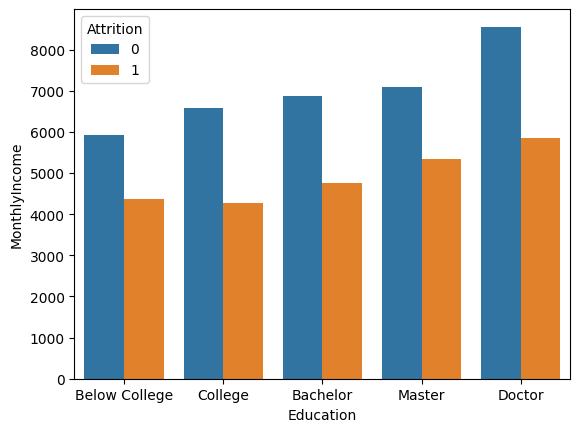

In [14]:
# Does income level or education level contribute to attrition?
income_by_education = data.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().reset_index()
sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=income_by_education)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.show()

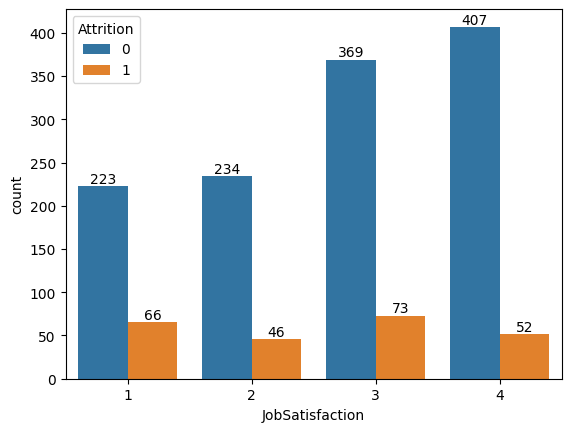

In [15]:
#Are employees with lower job satisfaction more likely to leave?

ax = sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)


for bars in ax.containers:
    ax.bar_label(bars)

- Employees who have a higher level of job satisfaction have the ability to stay in the job, but the attrition rate is close between all levels. For example, at level No. 4, the highest level of satisfaction is not the lowest level of attrition.

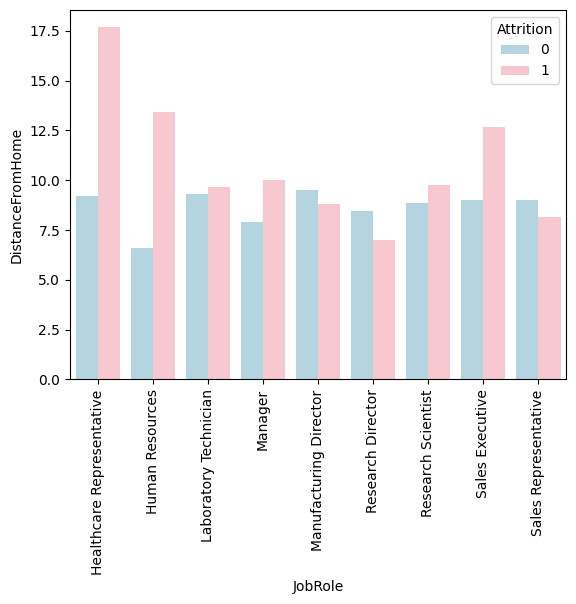

In [16]:
#Do employees who live farther from work have higher attrition, and does this vary by job role?


distance_by_job_role = data.groupby(['JobRole', 'Attrition'])['DistanceFromHome'].mean().reset_index()
ax = sns.barplot(x='JobRole', y='DistanceFromHome', hue='Attrition', data=distance_by_job_role,palette=["lightblue","pink"])
plt.xticks(rotation=90)
plt.show()

- We note that due to the distance from home, they may tend to leave work and suffer from a higher attrition rate.

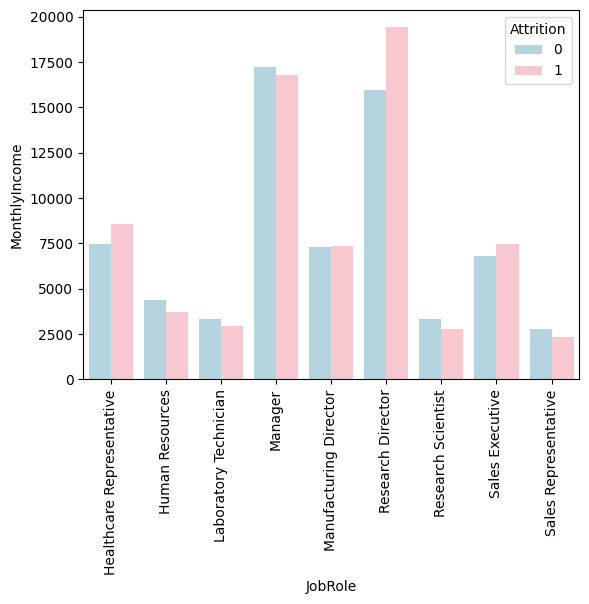

In [18]:
#Are certain job roles paid less, leading to higher attrition?

monthly_income_by_role = data.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].mean().reset_index()
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=monthly_income_by_role,palette=["lightblue","pink"])
plt.xticks(rotation=90)
plt.show()

- We note that wages do not have a strong relationship with attrition because it is clear from the figure that high wages have an increase in attrition

In [19]:
df = data.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])

In [21]:
#convert catogrical columns to numarical 

encoder = OneHotEncoder()

data_new = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Gender',
 'OverTime']])

In [22]:
df1 = pd.DataFrame(data_new.toarray(),columns = encoder.get_feature_names_out())

df1 = pd.concat([df, df1],axis=1)
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Gender',
 'OverTime'],axis =1)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

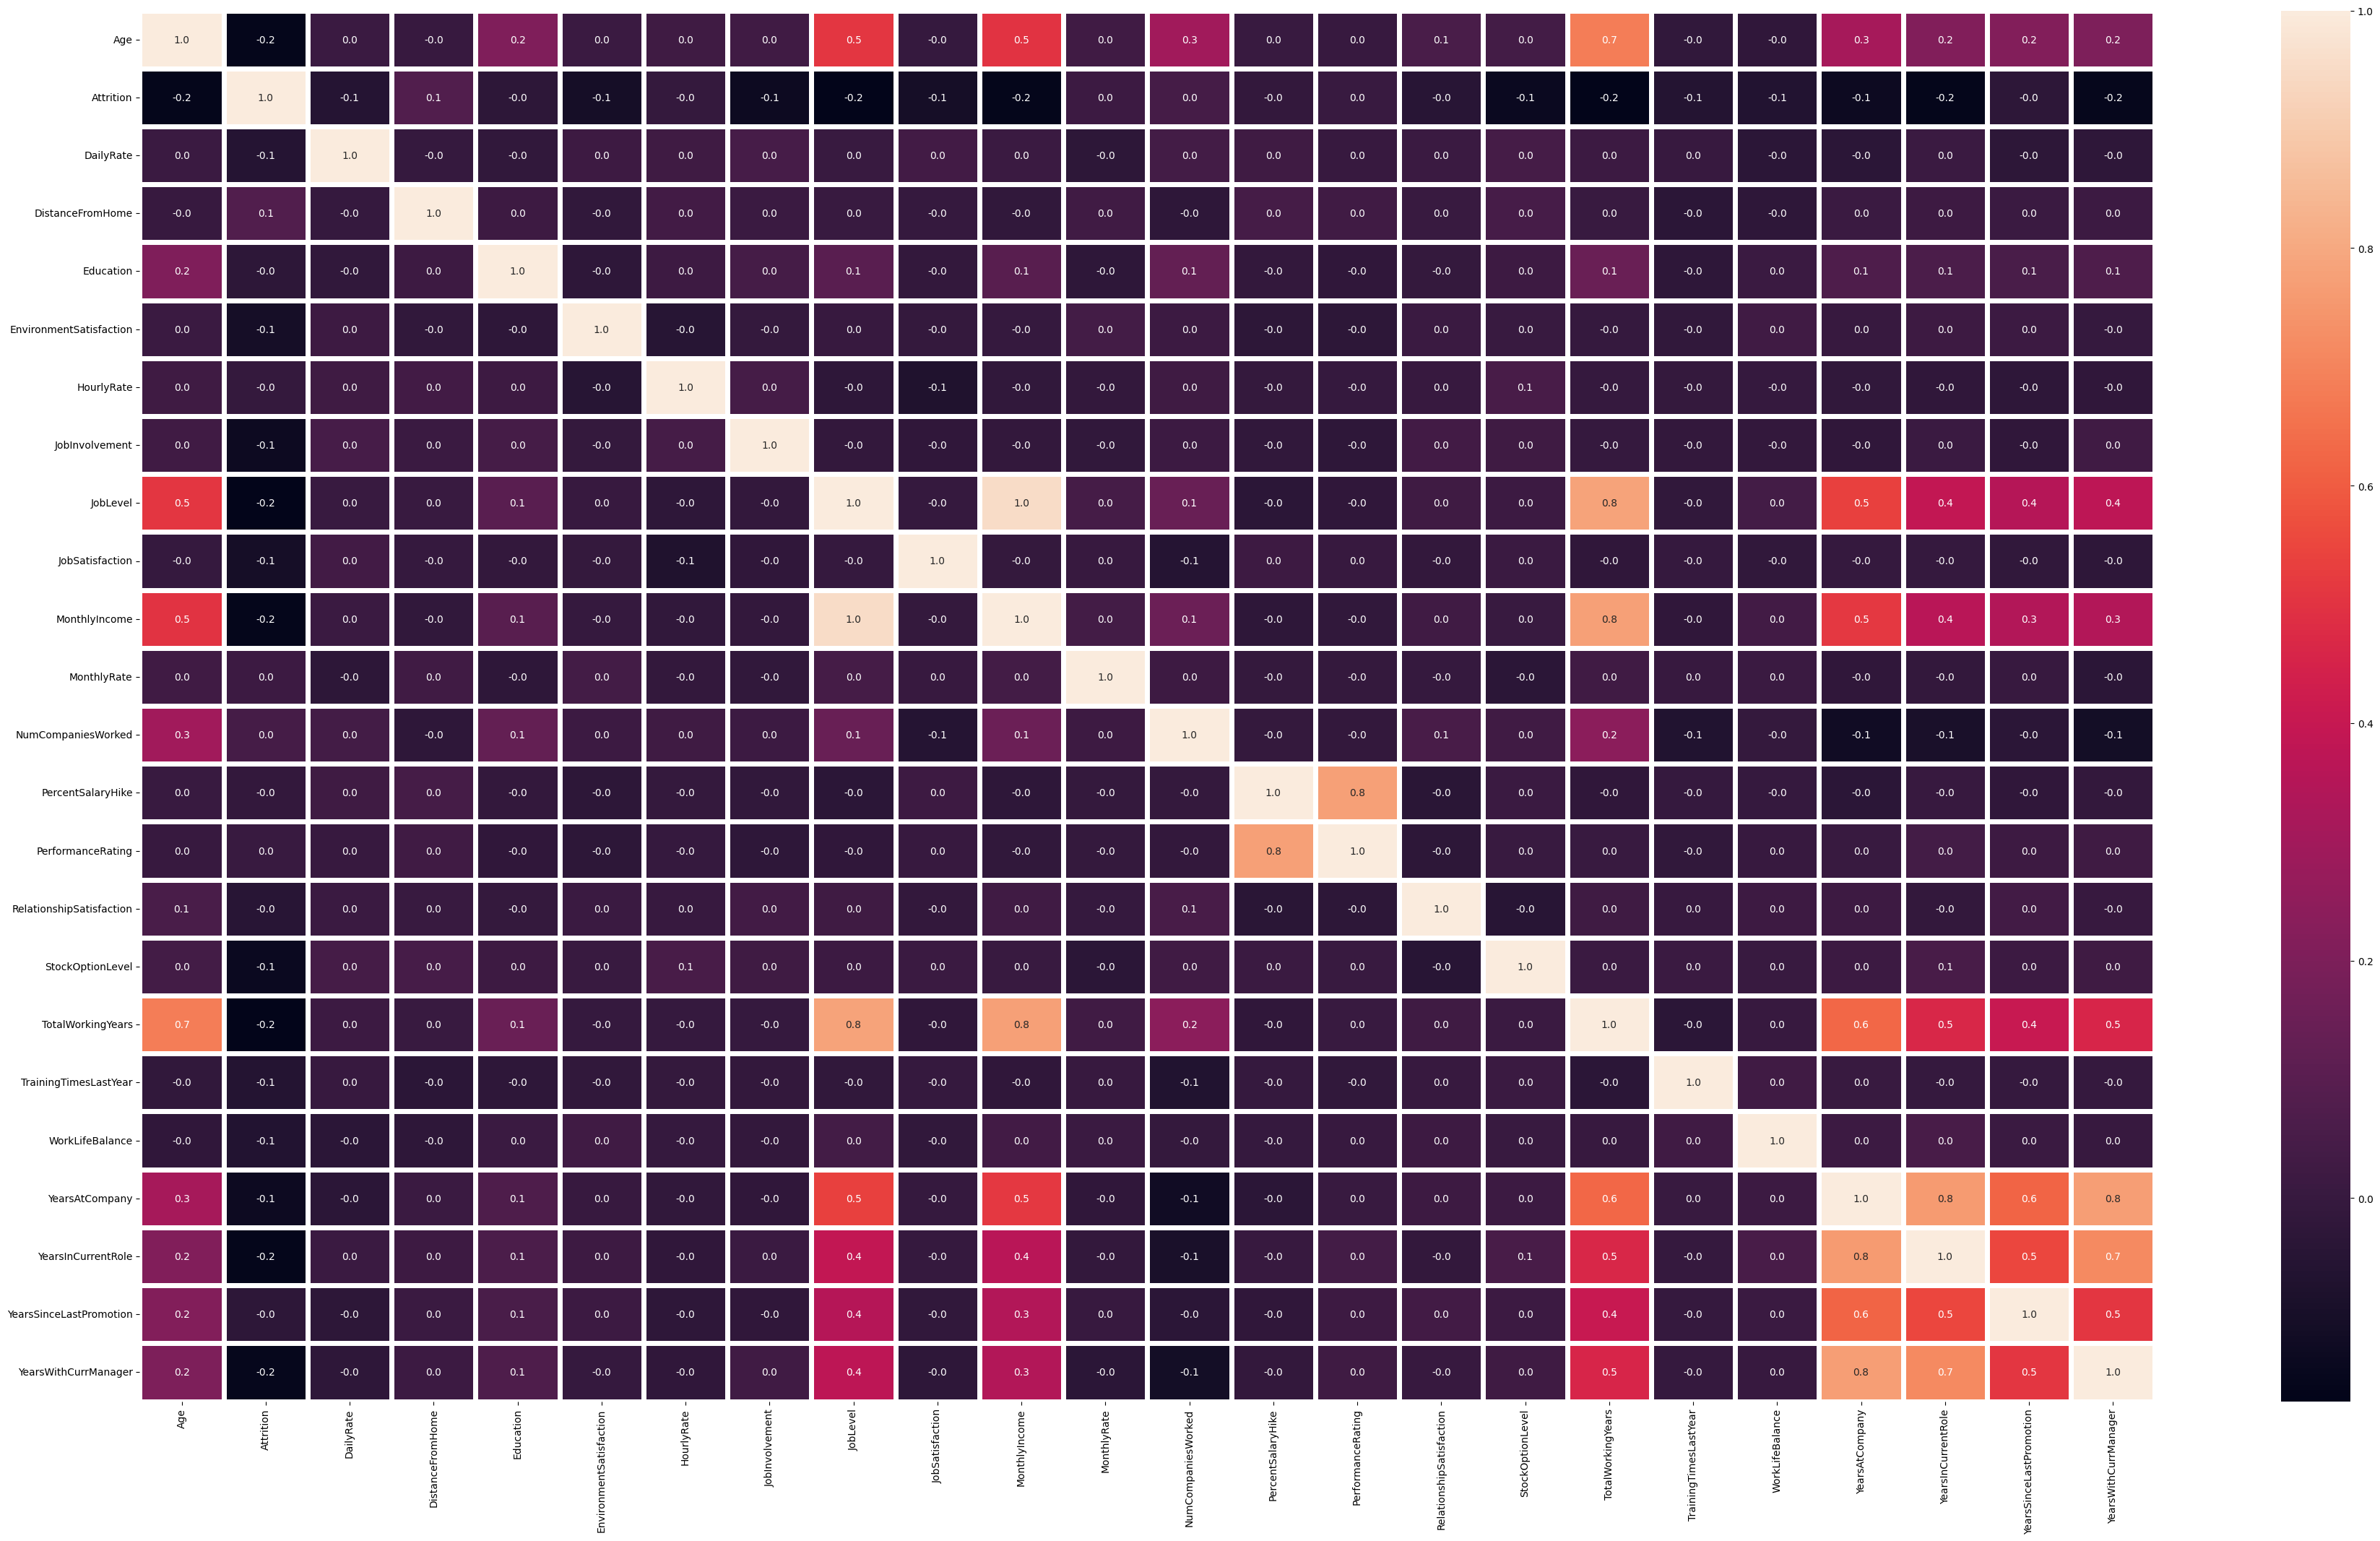

In [23]:
plt.figure(figsize=(45,25))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot =True,fmt=".1f",linewidths=5)
plt.show()

- high corrlation JobSatisfaction and TotalWorkingYears
- MonthlyIncome and TotalWorkingYears
- PercentSalaryHike and PerformanceRating
- YearsWithCurrManager and YearsInCurrentRole and YearsAtCompany,
etc

In [24]:
from scipy.stats import chi2_contingency

for col in ['Gender', 'OverTime', 'JobRole']:
    contingency_table = pd.crosstab(data[col], data['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: p-value={p}")

Gender: p-value=0.29057244902890855
OverTime: p-value=8.15842372153832e-21
JobRole: p-value=2.752481638050657e-15


**Gender:** p-value = 0.2905

- The p-value is greater than the typical significance level of 0.05, meaning there is no statistically significant relationship between Gender and Attrition in this dataset.
- This suggests that gender does not strongly influence whether an employee leaves the company.

**OverTime:** p-value = 8.16e-21

- This extremely small p-value (much less than 0.05) indicates a very strong statistically significant relationship between OverTime and Attrition.
- Employees who work overtime are more likely to leave the company, based on this result.

**JobRole:** p-value = 2.75e-15

- The p-value is also very small, indicating a strong statistically significant relationship between JobRole and Attrition.
- Certain job roles may have higher attrition rates, so it's worth exploring which roles are most affected.


/tmp/ipykernel_22285/3170085606.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='YearsAtCompany', data=data, palette='Set2')


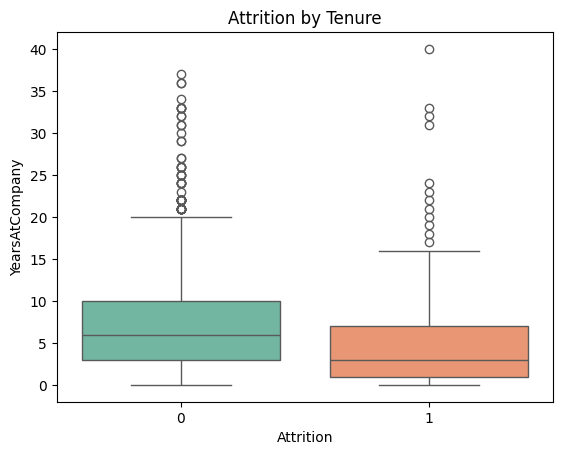

In [25]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data, palette='Set2')
plt.title('Attrition by Tenure')
plt.show()

### Work-Life Balance

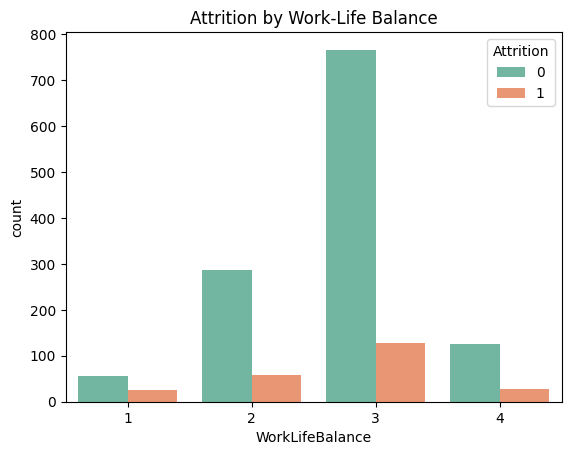

In [27]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data, palette='Set2')
plt.title('Attrition by Work-Life Balance')
plt.show()

### Salary Progression

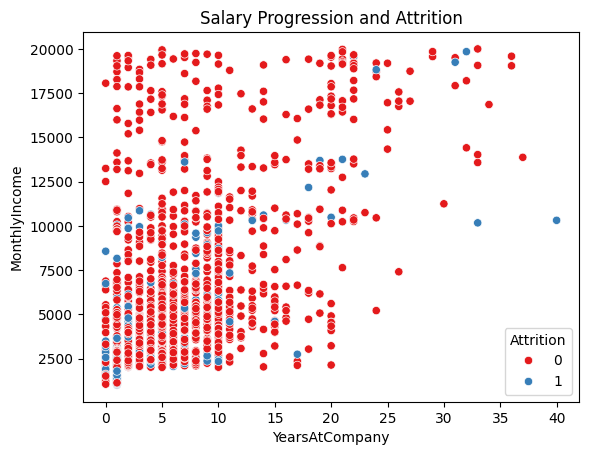

In [28]:
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', data=data, palette='Set1')
plt.title('Salary Progression and Attrition')
plt.show()

### Clustering Analysis for Segmentation

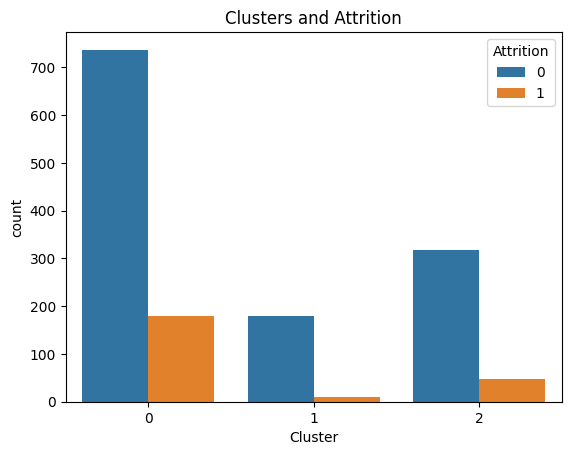

In [29]:
from sklearn.cluster import KMeans

features = df[['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
sns.countplot(x='Cluster', hue='Attrition', data=df)
plt.title('Clusters and Attrition')
plt.show()

### Feature Importance with Machine Learning

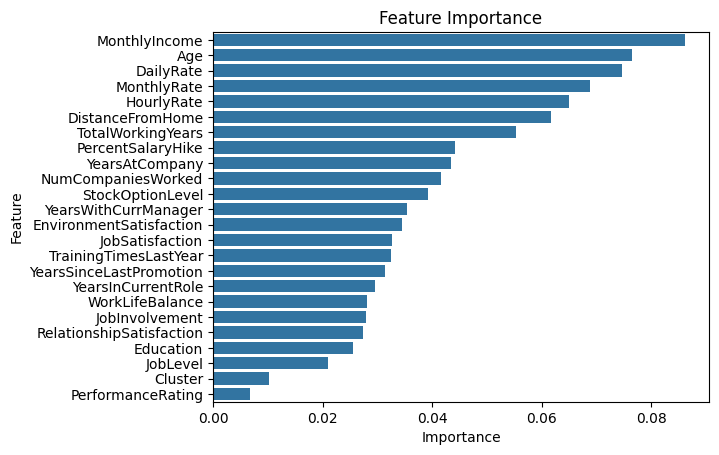

In [30]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Attrition'])
y = df['Attrition']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

### Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)  # Feature columns
y = df['Attrition']  # Target column

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294

